# Table of Contents

- **Data Representation**
- **Supervised Learning**
    - Example: Classification with KNearestNeighbors
- **Unsupervised Learning**
    - Example: Dimensionality Reduction with PCA
- **Scikit-learn's estimator interface**
- **Evaluation Metrics for classification problems**
- **Model Evaluation**
- **Cross-Validation**
- **`sklearn` Pipelines: Chaining estimators**
- **Feature Selection**
    - K-Best selection
- **Classifiers comparison**


From the [sklearn tutorial](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/general_concepts.html) "Machine Learning 101: General Concepts"

[**scikit-learn**](http://scikit-learn.org) is a Python package designed to give access to well-known **machine learning algorithms within Python** code, through a clean, well-thought-out API. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

scikit-learn is built upon Python's [NumPy](http://www.numpy.org/) (Numerical Python) and [SciPy](http://www.scipy.org/) (Scientific Python) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is some work in this area.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Data Representation

Most machine learning algorithms implemented in scikit-learn expect a **two-dimensional array or matrix** `X`, usually represented as a NumPy ndarray. The expected shape of `X` is `(n_samples, n_features)`.

* `n_samples`: The number of samples, where each sample is an item to process (e.g., classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* `n_features`:	The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. In this case we may use `scipy.sparse` matrices instead of NumPy arrays so as to make the data fit in memory.

The *supervised* machine learning algorithms implemented in scikit-learn also expect a **one-dimensional array** `y` with shape `(n_samples,)`. This array associated a target class to every sample in the input `X`.

![data-layout.png](images/data-layout.png)



As an example, we will explore the **Iris dataset**. The machine learning community often uses a simple flowers database where each row in the database (or CSV file) is a set of measurements of an individual iris flower. Each sample in this dataset is described by 4 features and can belong to one of three target classes:

**Features in the Iris dataset:**
 	
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**Target classes to predict:**
 	
* Iris Setosa
* Iris Versicolour
* Iris Virginica

Scikit-Learn embeds a copy of the Iris CSV file along with a helper function to load it into NumPy arrays:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

The features of each sample flower are stored in the `data` attribute of the dataset:

In [5]:
n_samples, n_features = iris.data.shape

print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the `target` attribute of the dataset:

In [7]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [9]:
print(iris.target), iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(None, array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [10]:
unique, counts = np.unique(iris.target, return_counts = True)
dict(zip(unique,counts))

{0: 50, 1: 50, 2: 50}

This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot:

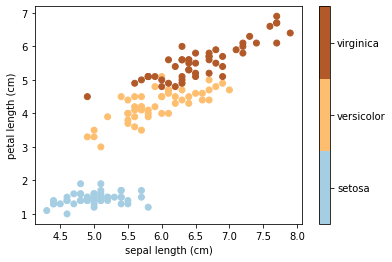

In [12]:
x_index = 0
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.cm.get_cmap('Paired', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.show()

Data exploration using pandas

In [13]:
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
df_iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [15]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

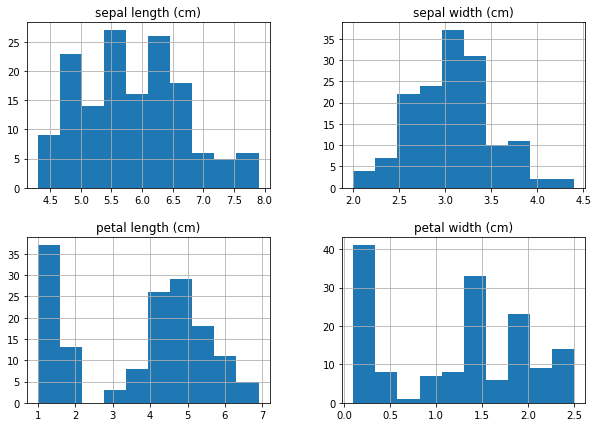

In [17]:
df_iris.iloc[:,:-1].hist(figsize = (10,7))
plt.show()

## Supervised Learning

![supervised machine learning overview](images/plot_ML_flow_chart_12.png)

A supervised learning algorithm makes the distinction between the raw observed data `X` with shape `(n_samples, n_features)` and some label given to the model while training by some teacher. 
In scikit-learn this array is often noted `y` and has generally the shape `(n_samples,)`.

After training, the fitted model does no longer expect the `y` as an input: it will try to predict the most likely labels `y_new` for a new set of samples `X_new`.

Depending on the nature of the target `y`, supervised learning can be given different names:

* If `y` has values in a fixed set of **categorical outcomes** (represented by integers) the task to predict `y` is called **classification**.
* If `y` has **floating point values** (e.g. to represent a price, a temperature, a size...), the task to predict `y` is called **regression**.

### Classification Example

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [19]:
KNeighborsClassifier?

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


## Unsupervised Learning

![unsupervised machine learning overview](images/plot_ML_flow_chart_32.png)

Unsupervised learning addresses a different sort of problem. Here the data has no labels, and we are interested in finding similarities between the objects in question. 
An unsupervised learning algorithm only uses a single set of observations `X` with shape `(n_samples, n_features)` and does not use any kind of labels.

Unsupervised learning comprises tasks such as *dimensionality reduction* and *clustering*. For example, in the Iris data discussed above, we can use unsupervised methods to determine combinations of the measurements which best display the structure of the data. 

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful features in heterogeneous data, and then these features can be used within a supervised framework.

### Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimensionality reduction technique that can find the combinations of variables that explain the most variance.

Consider the Iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

In [22]:
PCA?

Reduced dataset shape: (150, 2)


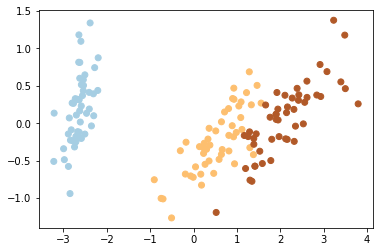

In [21]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Paired')
plt.show()

### Two examples of clustering in the reduced space

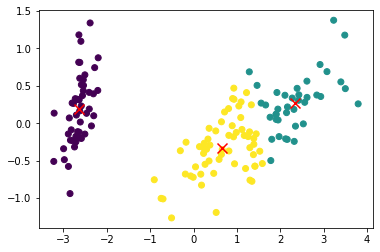

In [38]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)

centroids = k_means.cluster_centers_
plt.scatter([c[0] for c in centroids],[c[1] for c in centroids],c = 'r',marker = 'x', s = 100)

plt.show()

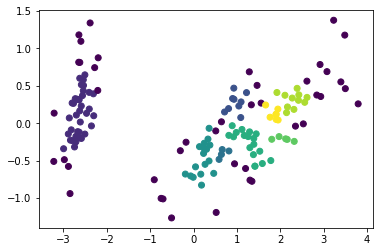

(None,
 array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
         0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
         0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
         1, -1,  3,  1,  2,  1, -1,  1,  3, -1, -1,  3,  4, -1,  1,  2,  3,
        -1,  3,  4,  3,  4,  4,  1,  1, -1, -1,  4, -1,  3,  3,  3,  4,  2,
         1,  1,  2,  3,  3,  3,  4,  3, -1,  3,  3,  3, -1, -1,  3, -1,  4,
         6,  5, -1, -1, -1, -1,  5, -1,  7,  5,  6, -1,  4,  7,  7, -1, -1,
        -1,  6, -1, -1,  4,  6, -1,  4,  4,  5,  6, -1, -1,  5,  4,  4, -1,
         6,  7,  4,  6,  6,  6,  4,  6,  6,  7,  4,  7,  7,  4],
       dtype=int64))

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples = 4,eps = 0.2)
y_pred = dbscan.fit_predict(X_reduced)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)


plt.show(), y_pred

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we have seen examples of these above. Every algorithm is exposed in scikit-learn via an **estimator** object. Given a scikit-learn estimator object named model, the following methods are available:

* Available in **all estimators**:
    - `model.fit()`: fit training data. 
        - For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`). 
        - For unsupervised learning applications, this accepts only a single argument, the data `X` (e.g. `model.fit(X)`).

* Available in **supervised estimators**:

    - `model.predict()`: given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`), and returns the learned label for each object in the array.
    - `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()`: for classification or regression problems, most estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

* Available in **unsupervised estimators**:

    - `model.predict()`: predict labels in clustering algorithms.
    - `model.transform()`: given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

## Evaluation Metrics for classification problems

Machine learning models are often used to predict the outcomes of a classification problem. Predictive models rarely predict everything perfectly, so there are many performance metrics that can be used to analyze our models.

When you run a prediction on your data to distinguish among two classes (*positive* and *negative* classes, for simplicity), your results can be broken down into 4 parts:

<img src="images/classification_report.png" alt="drawing" width="450"/>

* **True Positives**: data in class *positive* that the model predicts will be in class *positive*;
* **True Negatives**: data in class *negative* that the model predicts will be in class *negative*;
* **False Positives**: data in class *negative* that the model predicts will be in class *positive*;
* **False Negatives**: data in class *positive* that the model predicts will be in class *negative*.

The most common performance metrics in this binary classification scenario are the following:

* **accuracy**: the fraction of observations (both positive and negative) predicted correctly:

$$ Accuracy = \frac{(TP+TN)}{(TP+FP+TN+FN)} $$
* **recall**: the fraction of positive observations that are predicted correctly:

$$ Recall = \frac{TP}{(TP+FN)} $$

* **precision**: the fraction of of predicted positive observations that are actually positive:

$$ Precision = \frac{TP}{(TP+FP)} $$

* **f1-score**: a composite measure that combines both precision and recall:

$$ F_1 = \frac{2 \cdot P \cdot R}{(P+R)}$$

The **confusion matrix** is useful for quickly calculating precision and recall given the predicted labels from a model. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative. The actual values form the columns, and the predicted values (labels) form the rows. The intersection of the rows and columns show one of the four outcomes. 

![confusion-matrix.png](images/confusion-matrix.png)

## Model Evaluation

Consider the **digits** dataset example (8x8 images of handwritten digits).

| Syntax      | Description |
| ----------- | ----------- |
| Number of Instances | 1797       |
| Number of Attributes | 64        |
| Number of Classes | 10        |
| Attributes Information | 8x8 image of integer pixels in the range 0..16 |
| Missing Attribute Values | None |
| Date | July; 1998 |
| Info | [digits-dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) |

In [44]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
X = digits.data
y = digits.target

In [45]:
X.shape, y.shape

((1797, 64), (1797,))

In [46]:
unique, counts = np.unique(y, return_counts = True)
dict(zip(unique,counts))

{0: 178,
 1: 182,
 2: 177,
 3: 183,
 4: 181,
 5: 182,
 6: 181,
 7: 179,
 8: 174,
 9: 180}

 **How might we check the performance of our model?**


A simple way to test a model is to **use a hold-out set which doesn't participate in the training**, using scikit-learn's `train_test_split` utility, defined in the `sklearn.model_selection` module.

In [47]:
# from sklearn.model_selection import train_test_split
# train_test_split?

# <font color='blue'>TODO:</font> 
- #### <font color='blue'>Split the dataset in training and test set</font>
- #### <font color='blue'>Fit a KNN model with default parameters</font>
- #### <font color='blue'>Predict the label of samples in the test set and evaluate the performance of the classifier</font>

In [49]:
# solution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)

X_train.shape, X_test.shape

((1257, 64), (540, 64))

Now we train on the training data, and validate on the test data:

In [50]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"{np.sum(y_test == y_pred)} / { len(y_test)} correct")
print(np.sum(y_test == y_pred)/len(y_test))


532 / 540 correct
0.9851851851851852


This gives us a more reliable estimate of how our model is doing.

The metric we're using here, comparing the number of matches to the total number of samples, is known as the **accuracy score**, and can be computed using the following routine:

In [51]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

print(accuracy_score(y_test, y_pred))

0.9851851851851852


Let's quantify the classifier's prediction performance by generating a scikit-learn **classification report**:

In [53]:
classification_report?

In [54]:
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        42
           1     0.9524    1.0000    0.9756        60
           2     1.0000    1.0000    1.0000        58
           3     0.9808    0.9808    0.9808        52
           4     1.0000    0.9828    0.9913        58
           5     1.0000    1.0000    1.0000        60
           6     1.0000    1.0000    1.0000        55
           7     0.9623    1.0000    0.9808        51
           8     0.9600    0.9412    0.9505        51
           9     1.0000    0.9434    0.9709        53

    accuracy                         0.9852       540
   macro avg     0.9855    0.9848    0.9850       540
weighted avg     0.9855    0.9852    0.9852       540



Confusion Matrix: from the [documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

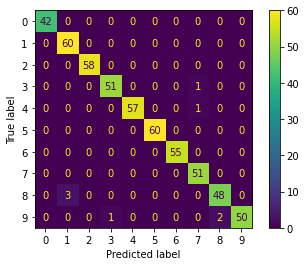

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Cross Validation

Single hold-out validation may provide a coarse estimate of the generalization capability of the model.
Random sampling of examples for training and testing may not be sufficient, for example, to compare the performance of several classifiers.


Another option is to use **$K$-fold cross-validation**, where we partition the data into $K$ subsets, called **folds**. Then, we iteratively train the algorithm on $k-1$ folds while using the remaining fold as the test set (called the “**holdout fold**”):

![Cross-Validation-Diagram.jpg](images/Cross-Validation-Diagram.jpg)

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(5)

for enu,(train_index, test_index) in enumerate(skf.split(X, y)):
    print()
    print(f'-------------------------------------------fold {enu}')
    print(f'')
    print("TRAIN:", train_index, train_index.shape)
    print("TEST:", test_index, test_index.shape)

    # train model on the current training set
    # test model on the current test set
    
    print(f'-------------------------------------------end fold {enu}')

# compute average metrics


-------------------------------------------fold 0

TRAIN: [ 335  347  349 ... 1794 1795 1796] (1437,)
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 21

In [58]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(KNeighborsClassifier(5), X, y, cv=10)

print(cv)
print(cv.mean())

[0.92777778 0.98333333 0.97777778 0.95555556 0.97222222 0.97222222
 0.98888889 0.98324022 0.98324022 0.96648045]
0.9710738671632526


Suppose that you want to perform dimensionality reduction before. How can we combine the two steps?

## `sklearn` Pipelines: Chaining estimators

Pipeline can be used to **chain multiple estimators into one**. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. 



Note that:
- All estimators in a pipeline, except the last one, must be transformers (i.e., must have a `transform` method). 
- The last estimator may be any type (transformer, classifier, etc.)

Indeed you can include in your pipeline pretty any function for:
- [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [feature extraction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction)
- [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- classification / clustering


### Building and using a `pipeline`
The Pipeline is built using a list of **(key, value) pairs**, where 
- the key is a string containing the name you want to give this step 
- the value is an estimator object

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA(n_components=0.95)), ('clf', KNeighborsClassifier())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA(n_components=0.95)),
                ('clf', KNeighborsClassifier())])

Calling `fit` on the pipeline is the same as 
- sequentially calling fit on each estimator
- transform the input and pass it on to the next step. 

Furthermore, the pipeline has **all the methods that the last estimator in the pipeline has**. 

In [59]:
Xtr, Xte, ytr, yte = train_test_split(X,y)

In [60]:
Xtr.shape, Xte.shape, ytr.shape, yte.shape

((1347, 64), (450, 64), (1347,), (450,))

In [63]:
pipe.fit(Xtr,ytr)

Pipeline(steps=[('reduce_dim', PCA(n_components=0.95)),
                ('clf', KNeighborsClassifier())])

In [64]:
y_pred = pipe.predict(Xte)

In [65]:
accuracy_score(y_pred,yte)

0.9866666666666667

### Accessing the steps of a `pipeline`

We can access the steps of a `pipeline` in three ways:
- throught the `steps` attribute
- by index
- by name



In [66]:
pipe.steps[0], pipe[0], pipe['reduce_dim']

(('reduce_dim', PCA(n_components=0.95)),
 PCA(n_components=0.95),
 PCA(n_components=0.95))

In [67]:
pipe[0].components_

array([[-2.97828513e-18,  1.71300958e-02,  2.15708880e-01, ...,
         8.64870039e-02,  3.60436659e-02,  1.15668195e-02],
       [ 2.19542820e-18, -7.67834666e-03, -4.48316332e-02, ...,
         1.93798333e-01,  3.23585867e-02, -3.74854463e-03],
       [ 3.83356603e-18,  1.83484568e-02,  1.43129960e-01, ...,
         2.12557468e-01,  1.60066652e-01,  3.08308502e-02],
       ...,
       [-9.66823658e-18,  3.84641601e-03,  1.21439891e-01, ...,
        -8.31076067e-03,  3.62027817e-01,  1.53610438e-01],
       [ 6.68826774e-18, -9.45915259e-03, -4.46970161e-02, ...,
        -1.24838396e-01, -5.62095088e-03, -2.94695349e-02],
       [-3.94682211e-18, -2.54375564e-03, -6.70500570e-02, ...,
         3.04111076e-02,  8.46097855e-02,  5.09736277e-02]])

In [68]:
pipe[0].components_.shape

(29, 64)

In [69]:
pipe[0].transform(X_train).shape

(1257, 29)

### Why do we use pipelines?
Pipeline (equivalent to *WEKA meta-classifier*) serves multiple purposes here:

- Convenience and encapsulation: you only have to call **fit and predict once on your data** to fit a whole sequence of estimators.

- Joint parameter selection: you can **grid search over parameters of all estimators** in the pipeline at once.

- Safety: pipelines help **avoid leaking statistics from your test data into the trained model in cross-validation**, by ensuring that the same samples are used to train the transformers and predictors.

In [70]:
cross_val_score(pipe,X,y,cv = 10)

array([0.92777778, 0.99444444, 0.98333333, 0.95      , 0.97222222,
       0.98333333, 0.98888889, 0.98882682, 0.97765363, 0.96648045])

### Imbalance classification and cross-validation

`scikit-learn` does not natively handle methods for *imbalanced learning*.

[`Imbalanced-learn`](https://imbalanced-learn.org/stable/) (imported as `imblearn`) is an open source, MIT-licensed library relying on scikit-learn and provides tools when dealing with classification with imbalanced classes.

We can use the pipelines of imblearn in exactly the same way as those of scikit-learn, so that we can correctly perdorm rebalancing when working in cross-validation.

```python
from imblearn.pipeline import Pipeline
pipe = Pipeline([
        ('sampling', SMOTE()),
        ... ,
        ('classification', LogisticRegression())
    ])

results = cross_val_score(pipe, data, target, ...)
```

## Feature Selection

The dataset we want to feed into our machine learning model could include a vast amount of features. Among them, there can be *redundant* as well as *irrelevant* features. **Redundant features** convey the same information contained in other features, while **irrelevant features** regard information useless for the learning process.

While a domain expert could recognize such features, the process will be long or almost impossible to be carried out by hand. The **feature selection** methods aim at reducing automatically the number of features in a dataset without negatively impacting the predictive power of the learned model.

Three benefits of performing feature selection before modeling your data may be:

* **Reducing overfitting**: less redundant data means less opportunity to make decisions based on noise.
* **Improving accuracy**: less misleading data means modeling accuracy improves.
* **Reducing training time**: less data means that algorithms train faster.

The classes in the `sklearn.feature_selection` module can be used for feature selection/dimensionality reduction on sample sets.

The simplest baseline approach to feature selection is `VarianceThreshold`. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [71]:
from sklearn.feature_selection import VarianceThreshold

X_synth = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])
print(X_synth)

feat_selector = VarianceThreshold(threshold=0.2)
X_sel = feat_selector.fit_transform(X_synth)
print(X_sel)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


### K-Best selection

`SelectKBest` removes all but the $k$ highest scoring features, in terms of $\chi^2$

In [74]:
from sklearn.feature_selection import SelectKBest, chi2
feat_selector = SelectKBest(chi2,k=10) 

The `SelectKBest` object takes as input a scoring function that returns univariate scores. As scoring function, you may use:
- For regression: `f_regression`, `mutual_info_regression`
- For classification: `chi2`, `f_classif`, `mutual_info_classif`

The methods based on **F-test** estimate the degree of linear dependency between two random variables. On the other hand, **mutual information** methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

# <font color='blue'>TODO:</font> 
- #### <font color='blue'>Chain the feature-selection and the classification step in a pipeline</font>
- #### <font color='blue'>Evaluate the model using 10-fold stratified cross-validation</font>
- #### <font color='blue'>Can you tell whether using feature-selection is beneficial or not? </font>

In [72]:
# solution
n_folds = 10
skf = StratifiedKFold(n_folds)

With feature selection

In [75]:
# solution
from sklearn.model_selection import cross_validate # we use cross_validate in place of cross_val_score for obtaining multiple metrics and runtime
from sklearn.linear_model import LogisticRegression
pipe_fsel = Pipeline([('feat_sel', SelectKBest(chi2,k=20)), 
                 ('clf', KNeighborsClassifier())])
results_fsel = cross_validate(pipe_fsel,
               X,
               y,
               cv = skf, 
               n_jobs = -1) # Number of jobs to run in parallel. 
                            # Training the estimator and computing the score are parallelized over the cross-validation splits.

In [77]:
cross_validate?

In [78]:
results_fsel

{'fit_time': array([0.01699758, 0.01100397, 0.0109961 , 0.01200151, 0.01100206,
        0.00999904, 0.00899482, 0.00999284, 0.00599647, 0.00600505]),
 'score_time': array([0.01800203, 0.01800346, 0.01800203, 0.01599956, 0.01499557,
        0.02300429, 0.02000475, 0.0129993 , 0.0179975 , 0.01599216]),
 'test_score': array([0.86666667, 0.94444444, 0.9       , 0.85555556, 0.93888889,
        0.96666667, 0.94444444, 0.95530726, 0.89385475, 0.9273743 ])}

In [79]:
# solution
print(results_fsel['test_score'])
print(results_fsel['test_score'].mean())


[0.86666667 0.94444444 0.9        0.85555556 0.93888889 0.96666667
 0.94444444 0.95530726 0.89385475 0.9273743 ]
0.9193202979515828


Without feature selection

In [95]:
# solution
from sklearn.model_selection import cross_validate # we use cross_validate in place of cross_val_score for obtaining multiple metrics and runtime
from sklearn.linear_model import LogisticRegression
results = cross_validate(LogisticRegression(),
               X,
               y,
               cv = skf, 
               n_jobs = -1) # Number of jobs to run in parallel. 
                            # Training the estimator and computing the score are parallelized over the cross-validation splits.

In [97]:
# solution
print(results['test_score'])
print(results['test_score'].mean())



[0.90555556 0.96111111 0.87777778 0.92777778 0.94444444 0.96666667
 0.95       0.93854749 0.87150838 0.93854749]
0.928193668528864


## Classifiers comparison


In [98]:
metrics = pd.DataFrame({'KNN':results['test_score'],'Fsel-KNN': results_fsel['test_score']})
metrics

,KNN,Fsel-KNN
0,0.905556,0.866667
1,0.961111,0.944444
2,0.877778,0.900000
3,0.927778,0.855556
4,0.944444,0.938889
5,0.966667,0.966667
6,0.950000,0.944444
7,0.938547,0.955307
8,0.871508,0.893855
9,0.938547,0.927374


array([[<AxesSubplot:title={'center':'KNN'}>,
        <AxesSubplot:title={'center':'Fsel-KNN'}>, <AxesSubplot:>]],
      dtype=object)

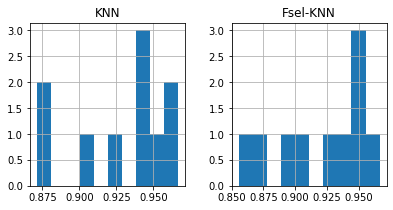

In [99]:
metrics.hist(layout = (1,3),figsize = (10,3))

<AxesSubplot:>

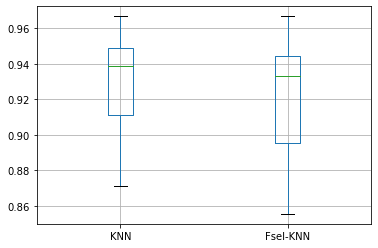

In [100]:
metrics.boxplot()

#### Statistical tests
- [t-test for paired samples](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples) ([scipy ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))
- [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) ([scipy ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html))
    - serves the same purpose of student *t*-test for matched samples, but does not assume that the data is normally distributed
    - tests the **null hypothesis** that **two related paired samples come from the same distribution**.


In [104]:
wilcoxon?

In [105]:
from scipy.stats import wilcoxon
wilcoxon(metrics.KNN,metrics['Fsel-KNN'])

WilcoxonResult(statistic=18.0, pvalue=0.5936305914425295)

***p*-value** is the probability of obtaining a value of the W statistic equal to or lower than the one actually observed, under the assumption that the null hypothesis is correct.

A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

In other words, given a confidence level $\alpha$ (typically 0.05), we can conclude that:

- if ***p*-value $ \leq \alpha$**, I reject the null hypothesis (with a confidence level of $\alpha$): result is said to be statistically significant. 
- if ***p*-value $ > \alpha$**, I cannot reject the null hypothesis.